AVANCE 1

In [16]:
import pandas as pd
import numpy as np


#se importa el archivo
data_latinoamerica = pd.read_csv(
    "C:/Users/pablo/Desktop/data_latinoamerica.csv",    
    parse_dates=['date']
)

data_latinoamerica.shape
data_latinoamerica.info()

mascara_fecha = data_latinoamerica['date']>'2021-01-01'

#filtro 'date' a las fechas mayores a la pedida
data_filter = data_latinoamerica[mascara_fecha]

#lista con los paises para filtrar
paises = ['AR','CL','CO','MX','PE','BR']

#creo una mascara para filtrar paises
mascara_paises = data_filter['location_key'].isin(paises)

#filtro los paises
data_final = data_filter[mascara_paises]


#visualizo donde hay valores nulos
total_nulos= data_final.isnull().sum().sort_values(ascending=False)

#borro las filas donde todos son nulos
data_final = data_final.dropna(how='all')
#borro las columnas donde todos son nulos
data_final = data_final.dropna(axis=1, how='all')
data_final
total_nulos

#luego de leer el readme determino que columnas deben ser llenados
#con la media y cuales con la mediana

cols_mediana = [
    'population', 'population_male', 'population_female',
    'population_rural', 'population_urban', 'population_density',
    'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
    'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
    'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older',
    'gdp_usd', 'gdp_per_capita_usd', 'human_development_index', 'life_expectancy',
    'smoking_prevalence', 'diabetes_prevalence', 'infant_mortality_rate',
    'adult_male_mortality_rate', 'adult_female_mortality_rate',
    'pollution_mortality_rate', 'comorbidity_mortality_rate',
    'nurses_per_1000', 'physicians_per_1000','rainfall_mm'
]

cols_media = ['average_temperature_celsius', 'minimum_temperature_celsius', 'maximum_temperature_celsius', 'relative_humidity']

#agrupo por location key para llenar con la media y mediana
#segun su pais
medias = data_final.groupby('location_key')[cols_media].transform("mean")
medianas = data_final.groupby('location_key')[cols_mediana].transform("median")


data_final[cols_media] = data_final[cols_media].fillna(medias)
data_final[cols_mediana] = data_final[cols_mediana].fillna(medianas)



#bucle for para el cálculo de estadísticas descriptivas y otras métricas importantes


for columna in data_final:
    print(f'estadistica descriptiva de la columna {columna}: {data_final[columna].describe()}')
    


#funcion para obtener la mediana, varianza y el rango

def med_var_ran(columna):
    mediana = columna.median()
    varianza = columna.var()
    rango = max(columna) - min(columna)
    return f'la mediana es {mediana}, su varianza {varianza} y el rango {rango}'

med_var_ran(data_final['population'])


#¿Qué representa la mediana?
#el valor medio dentro de un conjunto de datos
#¿Cómo varía la dispersión de los datos en el conjunto de datos analizado, en términos de la varianza y el rango? 
#dependa la columna el resultado de la varianza y el rango se puede ver afectado por valores atipicos
#¿Qué nos puede indicar esto sobre la consistencia o la variabilidad de los datos en relación con la mediana?
#si los valores son muy desparejos, se evalua si rinde mas utilizar la media o la mediana
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12216057 entries, 0 to 12216056
Data columns (total 50 columns):
 #   Column                                 Dtype         
---  ------                                 -----         
 0   location_key                           object        
 1   date                                   datetime64[ns]
 2   country_code                           object        
 3   country_name                           object        
 4   new_confirmed                          float64       
 5   new_deceased                           float64       
 6   cumulative_confirmed                   float64       
 7   cumulative_deceased                    float64       
 8   cumulative_vaccine_doses_administered  float64       
 9   population                             float64       
 10  population_male                        float64       
 11  population_female                      float64       
 12  population_rural                       float64       


In [17]:
#guardado en otro archivo

nuevo_path = "C:/Users/pablo/Desktop/archivos_proyecto4/DatosFinalesFiltrado.csv"

data_final.to_csv(nuevo_path, index=False)

AVANCE 2

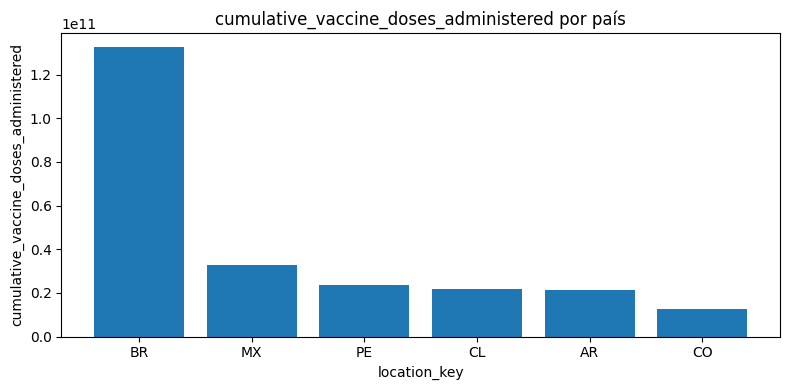

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

avance2 = pd.read_csv("C:/Users/pablo/Desktop/archivos_proyecto4/DatosFinalesFiltrado.csv",parse_dates=['date'])
avance2['month'] = avance2['date'].dt.to_period('M')

columna_a_comparar = 'cumulative_vaccine_doses_administered'   

sumatoria_ordenada_por_pais = (avance2.groupby('location_key')[columna_a_comparar]
           .sum(min_count=1)                 
           .sort_values(ascending=False))


plt.figure(figsize=(8,4))
plt.bar(sumatoria_ordenada_por_pais.index, sumatoria_ordenada_por_pais.values)
plt.title(f'{columna_a_comparar} por país')
plt.xlabel('location_key')
plt.ylabel(columna_a_comparar)
plt.tight_layout()
plt.show()




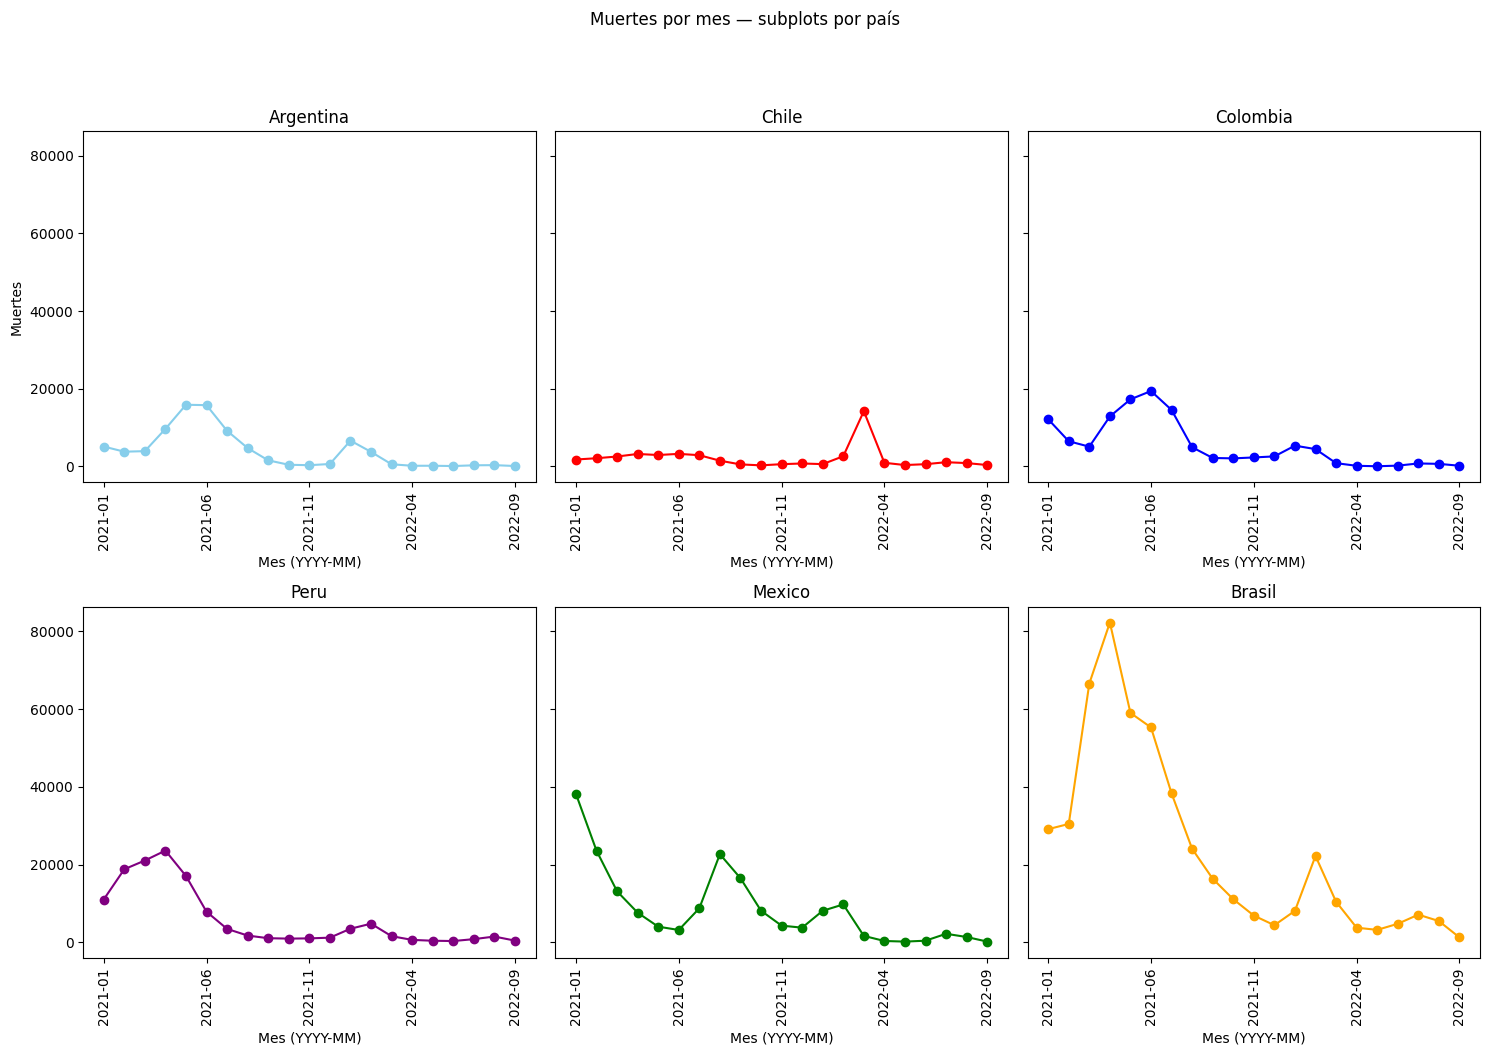

In [3]:
#Muertes por mes de cada país.


# 1) Agregado mensual de muertes
muertes_mensuales = (avance2
    .groupby(['location_key','month'], as_index=False)['new_deceased']
    .sum(min_count=1)
)

# 2) Pivot: filas = mes, columnas = país
pivot = (muertes_mensuales
         .pivot(index='month', columns='location_key', values='new_deceased')
         .sort_index())
pivot.index = pivot.index.astype(str)   # eje X legible

fig, ax = plt.subplots(2, 3, figsize=(15, 10), sharey=True)

# Argentina
pivot['AR'].plot(ax=ax[0][0], marker='o',color='skyblue')
ax[0][0].set_title('Argentina')
ax[0][0].set_xlabel('Mes (YYYY-MM)')
ax[0][0].set_ylabel('Muertes')
ax[0][0].tick_params(axis='x', rotation=90)

# Chile
pivot['CL'].plot(ax=ax[0][1], marker='o',color='red')
ax[0][1].set_title('Chile')
ax[0][1].set_xlabel('Mes (YYYY-MM)')
ax[0][1].tick_params(axis='x', rotation=90)

# Colombia
pivot['CO'].plot(ax=ax[0][2], marker='o',color='blue')
ax[0][2].set_title('Colombia')
ax[0][2].set_xlabel('Mes (YYYY-MM)')
ax[0][2].tick_params(axis='x', rotation=90)

#Peru
pivot['PE'].plot(ax=ax[1][0], marker='o',color='purple')
ax[1][0].set_title('Peru')
ax[1][0].set_xlabel('Mes (YYYY-MM)')
ax[1][0].tick_params(axis='x', rotation=90)

#Mexico
pivot['MX'].plot(ax=ax[1][1], marker='o',color='green')
ax[1][1].set_title('Mexico')
ax[1][1].set_xlabel('Mes (YYYY-MM)')
ax[1][1].tick_params(axis='x', rotation=90)

#Brasil
pivot['BR'].plot(ax=ax[1][2], marker='o',color='orange')
ax[1][2].set_title('Brasil')
ax[1][2].set_xlabel('Mes (YYYY-MM)')
ax[1][2].tick_params(axis='x', rotation=90)


plt.suptitle('Muertes por mes — subplots por país', y=1.05)
plt.tight_layout()
plt.show()

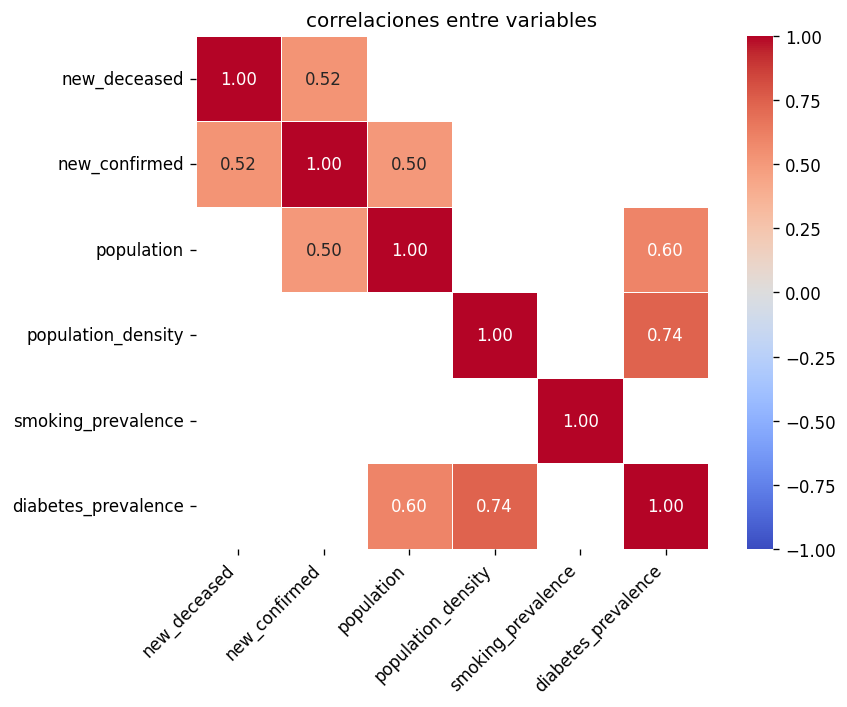

In [4]:
#Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad.
#Matriz de correlación de indicadores demográficos y de salud.


cols=['new_deceased','new_confirmed','population','population_density','smoking_prevalence','diabetes_prevalence']

corr = avance2[cols].corr()
corr_mask = corr >0.5
corr_fin = corr[corr_mask]

plt.figure(figsize=(8,6), dpi=120)
sns.heatmap(corr_fin,cmap="coolwarm",annot=True,fmt=".2f",vmin=-1, vmax=1, center=0,linewidths=0.6, linecolor="white",square=True)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("correlaciones entre variables")
plt.tight_layout()
plt.show()

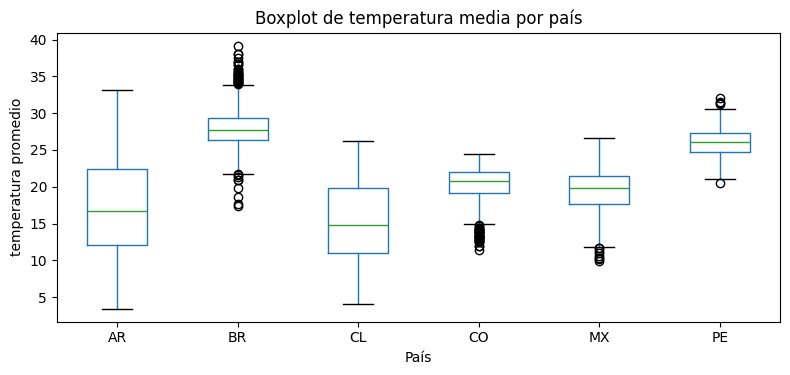

In [5]:
#Boxplot de temperatura media de cada país.

ax = avance2.boxplot(
    column='average_temperature_celsius',
    by='location_key',         
    grid=False,
    figsize=(8,4)
)
plt.title('Boxplot de temperatura media por país')
plt.suptitle('')               
plt.xlabel('País')
plt.ylabel('temperatura promedio')
plt.tight_layout()
plt.show()

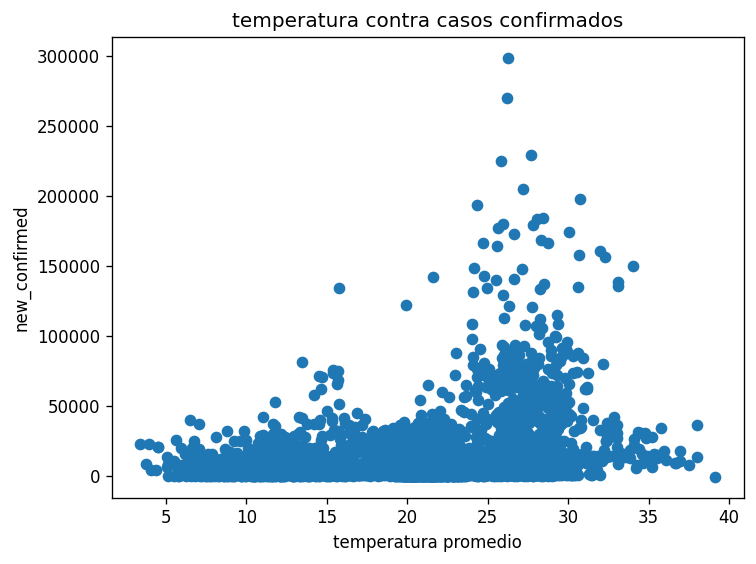

In [5]:
x = avance2['average_temperature_celsius']

y = avance2['new_confirmed']

fig, ax = plt.subplots(dpi=120)
plt.title('temperatura contra casos confirmados')
ax.scatter(x = x, y = y)
plt.ylabel('new_confirmed')
plt.xlabel('temperatura promedio')
plt.tight_layout()
plt.show()

AVANCE 3

In [30]:
avance3 = avance2.copy()

df = avance3.sort_values(['location_key','date']).copy()




In [ ]:
for c in ['cumulative_confirmed',
          'cumulative_deceased',
          'cumulative_recovered',
          'cumulative_vaccine_doses_administered']:

    # 1) Relleno dentro de cada país
    df[c] = df.groupby('location_key')[c].ffill().bfill()

    # 2) Forzar que el acumulado NO disminuya
    df[c] = df.groupby('location_key')[c].cummax()
    
    
df['cumulative_recovered']=df['cumulative_recovered'].fillna(0)


0       6756284.0
1       6756284.0
2       6756284.0
3       6756284.0
4       6756284.0
          ...    
3739          0.0
3740          0.0
3741          0.0
3742          0.0
3743          0.0
Name: cumulative_recovered, Length: 3744, dtype: float64

In [ ]:


df['new_confirmed'] = df['new_confirmed'].fillna(0)
df['new_deceased']  = df['new_deceased'].fillna(0)
df['new_recovered'] = df['new_recovered'].fillna(0)

for c in ['latitude','longitude']:
    df[c] = df.groupby('location_key')[c].ffill().bfill()


df['area_sq_km'] = df.groupby('location_key')['area_sq_km'].ffill().bfill()


df['area_sq_km'] = df['area_sq_km'].fillna(
    df.groupby('location_key')['area_sq_km'].transform('median')
)

sparse_cols = ['population_largest_city','area_rural_sq_km','area_urban_sq_km']
for c in sparse_cols:
    df[c] = df.groupby('location_key')[c].ffill().bfill()
    

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 51 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   location_key                           3744 non-null   object        
 1   date                                   3744 non-null   datetime64[ns]
 2   country_code                           3744 non-null   object        
 3   country_name                           3744 non-null   object        
 4   new_confirmed                          3744 non-null   float64       
 5   new_deceased                           3744 non-null   float64       
 6   cumulative_confirmed                   3744 non-null   float64       
 7   cumulative_deceased                    3744 non-null   float64       
 8   cumulative_vaccine_doses_administered  3744 non-null   float64       
 9   population                             3744 non-null   float64 

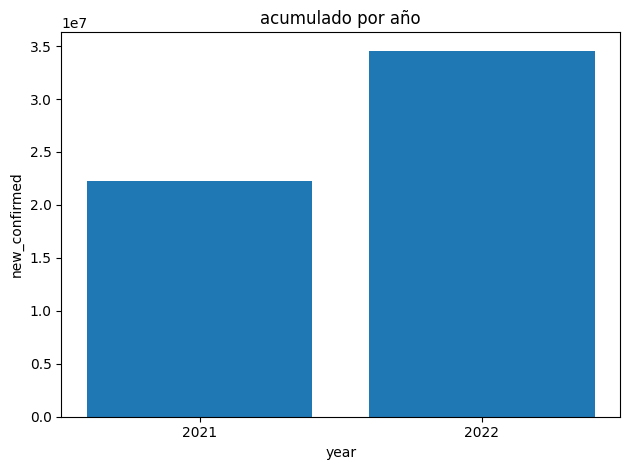

In [56]:
#acumulado de nuevos casos por año
df['year'] = df['date'].dt.to_period('Y')

y = df['cumulative_confirmed']
x = df['year'].astype('str')


fig, ax = plt.subplots()
ax.bar(x, y)
plt.title('acumulado por año')
plt.ylabel('new_confirmed')
plt.xlabel('year')
plt.tight_layout()
plt.show()

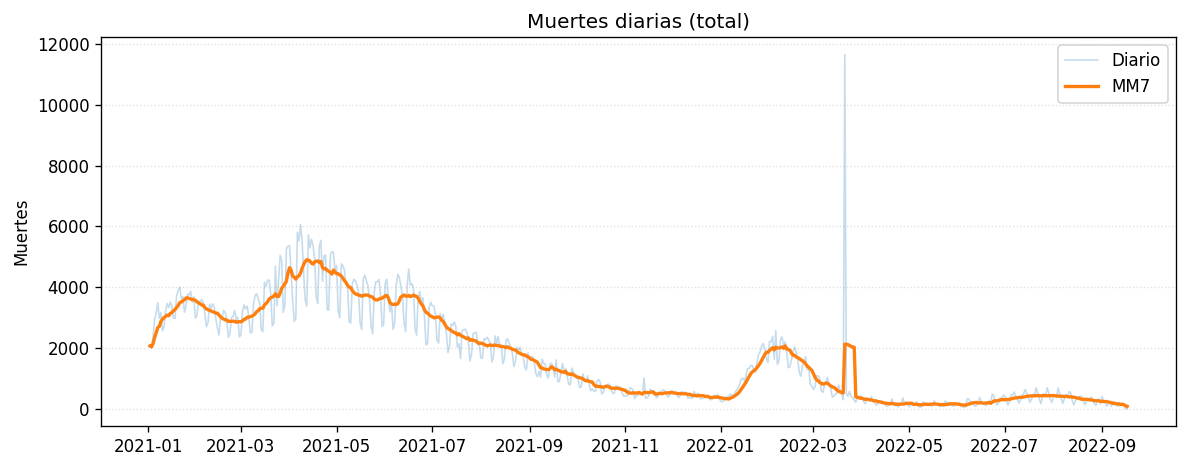

In [63]:

#Evolución del Número de Muertes Diarias.


df['day'] = df['date'].dt.to_period('D')

# 2) Agrupar por día
df_day = (df.groupby('day', as_index=False)['new_deceased']
            .sum(min_count=1)
            .sort_values('day'))

# 3) Para plot: pasar Period -> datetime
df_day['day_ts'] = df_day['day'].dt.to_timestamp()


df_day['mm7'] = df_day['new_deceased'].rolling(7, min_periods=1).mean()


fig, ax = plt.subplots(figsize=(10,4), dpi=120)
ax.plot(df_day['day_ts'], df_day['new_deceased'], alpha=.25, lw=1, label='Diario')
ax.plot(df_day['day_ts'], df_day['mm7'], lw=2, label='MM7')


ax.set_title('Muertes diarias (total)')
ax.set_ylabel('Muertes')
ax.set_xlabel('')
ax.grid(True, axis='y', linestyle=':', alpha=.4)
ax.legend() 
plt.tight_layout()
plt.show()


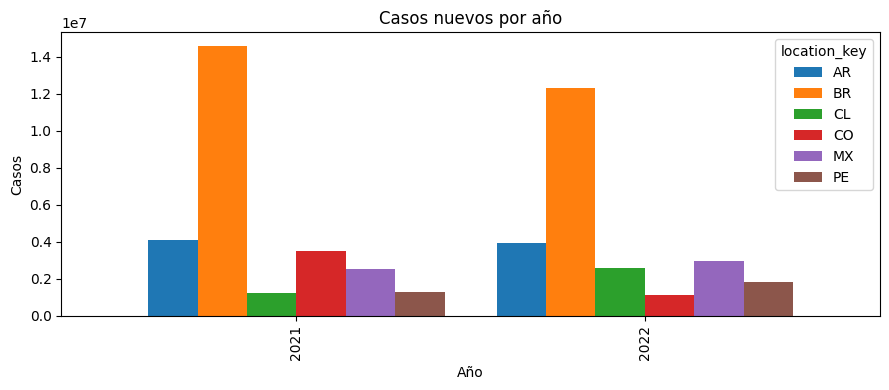

In [64]:

annual = (df.assign(year=df['date'].dt.year)
          .groupby(['location_key','year'], as_index=False)['new_confirmed']
          .sum(min_count=1))

pivot = (annual.pivot(index='year', columns='location_key', values='new_confirmed')
               .sort_index())

ax = pivot.plot(kind='bar', figsize=(9,4), width=0.85)
ax.set_title('Casos nuevos por año')
ax.set_xlabel('Año')
ax.set_ylabel('Casos')
plt.tight_layout()
plt.show()





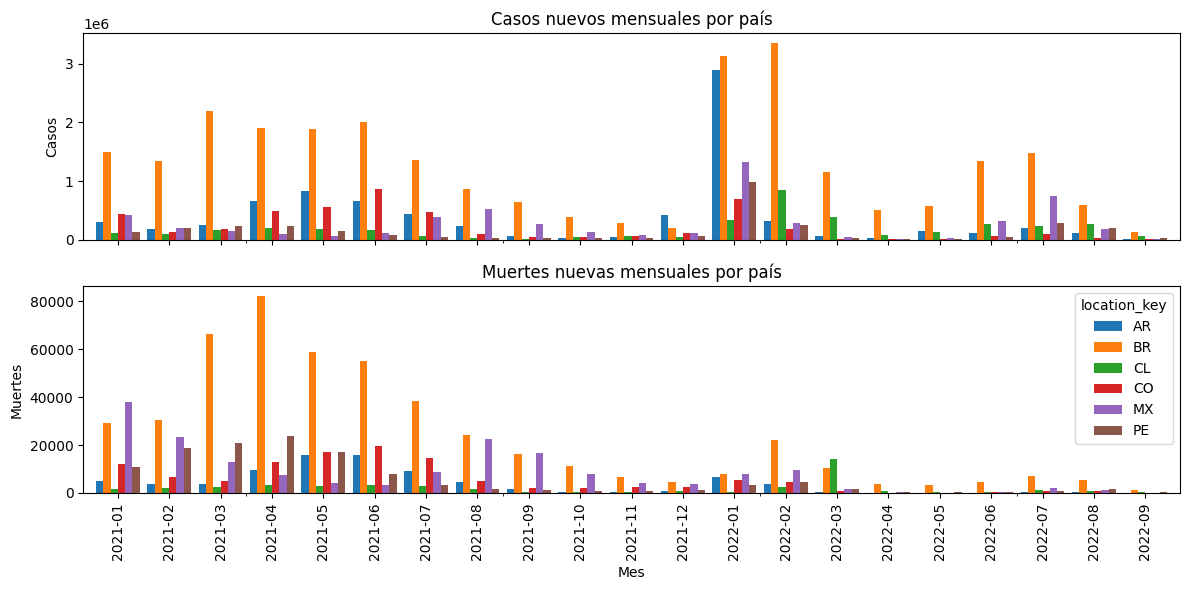

In [65]:

monthly = (df.assign(month=df['month'].astype(str))
           .groupby(['month', 'location_key'], as_index=False)
           .agg(new_confirmed=('new_confirmed','sum'),
                new_deceased =('new_deceased','sum'))
           .sort_values(['location_key','month']))

pivot_c = (monthly.pivot(index='month', columns='location_key', values='new_confirmed')
                  .sort_index())
pivot_d = (monthly.pivot(index='month', columns='location_key', values='new_deceased')
                  .sort_index())

fig, ax = plt.subplots(2, 1, figsize=(12,6), sharex=True)

pivot_c.plot(kind='bar', ax=ax[0], width=0.85, legend=False)
ax[0].set_title('Casos nuevos mensuales por país')
ax[0].set_ylabel('Casos')
ax[0].tick_params(axis='x', rotation=90)

pivot_d.plot(kind='bar', ax=ax[1], width=0.85)
ax[1].set_title('Muertes nuevas mensuales por país')
ax[1].set_xlabel('Mes')
ax[1].set_ylabel('Muertes')
ax[1].tick_params(axis='x', rotation=90)

plt.tight_layout()

plt.show()

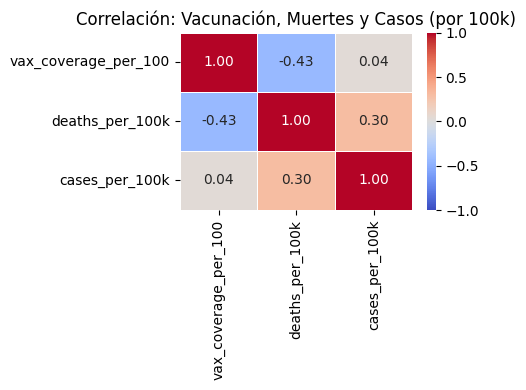

In [66]:
df['daily_vax'] = (df.groupby('location_key')['cumulative_vaccine_doses_administered']
                     .diff()
                     .clip(lower=0))


base_m = (
    df.groupby(['country_name', 'month'], as_index=False)
      .agg(
          cases_per_month=('new_confirmed', 'sum'),
          deaths_per_month=('new_deceased', 'sum'),
          vax_doses_per_month=('daily_vax', 'sum'),
          population=('population', 'mean')
      )
      .sort_values(['country_name', 'month'])
)

# === 4) Tasas y cobertura
base_m['cases_per_100k']  = base_m['cases_per_month']  / base_m['population'] * 100_000
base_m['deaths_per_100k'] = base_m['deaths_per_month'] / base_m['population'] * 100_000

base_m['cum_vax_doses'] = base_m.groupby('country_name')['vax_doses_per_month'].cumsum()
base_m['vax_coverage_per_100'] = base_m['cum_vax_doses'] / base_m['population'] * 100

# === 5) Gráfico de correlación (incluye MUERTES y CASOS)
corr = base_m[['vax_coverage_per_100', 'deaths_per_100k', 'cases_per_100k']].corr()

plt.figure(figsize=(5,4))
sns.heatmap(
    corr, annot=True, fmt='.2f',
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm', linewidths=.5, linecolor='white'
)
plt.title('Correlación: Vacunación, Muertes y Casos (por 100k)')
plt.tight_layout()
plt.show()

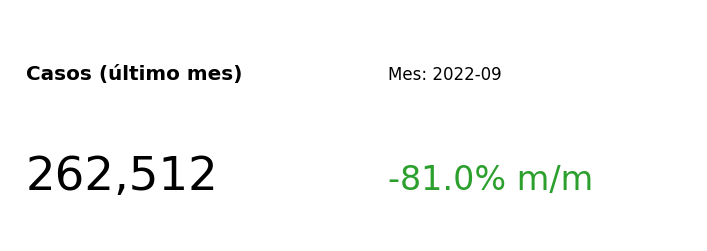

In [ ]:


m = (df.groupby('month', as_index=False)['new_confirmed'].sum()
       .sort_values('month'))

valor_actual = m['new_confirmed'].iloc[-1]
valor_previo = m['new_confirmed'].iloc[-2] if len(m) > 1 else 0
pct = 0 if valor_previo == 0 else (valor_actual/valor_previo - 1) * 100
actual_label = str(m['month'].iloc[-1])

fig, ax = plt.subplots(figsize=(6,2.2), dpi=120)
ax.axis('off')
ax.text(0.02, 0.70, 'Casos (último mes)', fontsize=12, weight='bold')
ax.text(0.02, 0.22, f'{valor_actual:,.0f}', fontsize=28)
ax.text(0.55, 0.70, f'Mes: {actual_label}', fontsize=10)
ax.text(0.55, 0.22, f'{pct:+.1f}% m/m',
        fontsize=20, color=('tab:green' if pct < 0 else 'tab:red'))
plt.tight_layout()
plt.show()

In [ ]:


m = (df.groupby('month', as_index=False)['new_deceased'].sum()
       .sort_values('month'))

valor_actual = m['new_deceased'].iloc[-1]
valor_previo = m['new_deceased'].iloc[-2] if len(m) > 1 else 0
pct = 0 if valor_previo == 0 else (valor_actual/valor_previo - 1) * 100
actual_label = str(m['month'].iloc[-1])

fig, ax = plt.subplots(figsize=(6,2.2), dpi=120)
ax.axis('off')
ax.text(0.02, 0.70, 'Muertes (último mes)', fontsize=12, weight='bold')
ax.text(0.02, 0.22, f'{valor_actual:,.0f}', fontsize=28)
ax.text(0.55, 0.70, f'Mes: {actual_label}', fontsize=10)
ax.text(0.55, 0.22, f'{pct:+.1f}% m/m',
        fontsize=20, color=('tab:green' if pct < 0 else 'tab:red'))
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

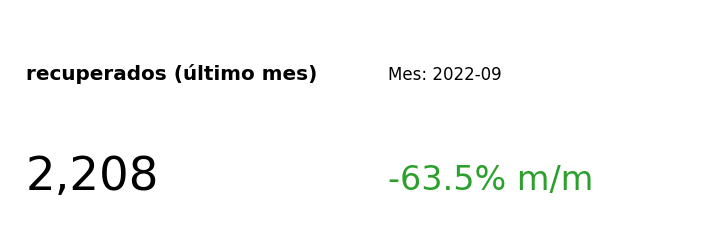

In [ ]:

m = (df.groupby('month', as_index=False)['new_recovered'].mean()
       .sort_values('month'))

valor_actual = m['new_recovered'].iloc[-1]
valor_previo = m['new_recovered'].iloc[-2] if len(m) > 1 else 0
pct = 0 if valor_previo == 0 else (valor_actual/valor_previo - 1) * 100
actual_label = str(m['month'].iloc[-1])

fig, ax = plt.subplots(figsize=(6,2.2), dpi=120)
ax.axis('off')
ax.text(0.02, 0.70, 'recuperados (último mes)', fontsize=12, weight='bold')
ax.text(0.02, 0.22, f'{valor_actual:,.0f}', fontsize=28)
ax.text(0.55, 0.70, f'Mes: {actual_label}', fontsize=10)
ax.text(0.55, 0.22, f'{pct:+.1f}% m/m',
        fontsize=20, color=('tab:green' if pct < 0 else 'tab:red'))
plt.tight_layout()
plt.show()

In [75]:
#guardado en otro archivo



nuevo_path = "C:/Users/pablo/Desktop/archivos_proyecto4/final.csv"

df.to_csv(nuevo_path, index=False)